# Music Recommendation System with Spotify Data
## 1. Load and preprocess data 
### Loading Data :


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = 'data/spotify_data.csv'
df = pd.read_csv(file_path)

In [29]:
print(df.head(5))
df.info()

   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  acoustic         0.409   0.234    3   -13.711     1   
3          58  2012  acoustic         0.392   0.251   10    -9.845     1   
4          54  2012  acoustic         0.430   0.791    6    -5.419     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0429      

### Data cleaning :

In [30]:
# View missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna() 

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64


### Audio Features Overview, Selection & Scaling : 

Below is a table summarizing key audio features of a track, along with a brief explanation of what each feature represents.

| **Audio Feature**   | **Description**        | **What It Tells Us**     |
|---------------------|-----------------------------------------------|-------------------------------------------------------------------------------------|
| **Popularity**      | Track popularity (0 to 100)       | How popular the track is, with higher values indicating greater popularity.         |
| **Year**| Year released (2000 to 2023)      | The release year of the track, useful for historical context or trends. |
| **Danceability**    | Track suitability for dancing (0.0 to 1.0)    | How suitable the track is for dancing, based on rhythm, tempo, and beat strength.   |
| **Energy**          | Perceptual measure of intensity and activity (0.0 to 1.0) | The intensity and activity level of the track; higher values feel more energetic.   |
| **Key** | The key the track is in (-1 to 11)| The musical key of the track (e.g., C, D#, etc.), where -1 means no key detected.   |
| **Loudness**        | Overall loudness in decibels (-60 to 0 dB)    | How loud the track is; closer to 0 dB means louder, more impactful sound.           |
| **Mode**| Modality of the track (Major = 1, Minor = 0)  | Whether the track is in a major (brighter) or minor (darker) key, affecting mood.   |
| **Speechiness**     | Presence of spoken words in the track         | How much spoken word is in the track; higher values indicate more speech-like content. |
| **Acousticness**    | Confidence measure from 0 to 1 of whether the track is acoustic | Likelihood of the track being acoustic; higher values mean more acoustic elements.  |
| **Instrumentalness**| Whether tracks contain vocals (0.0 to 1.0)    | Likelihood of the track being instrumental; higher values mean fewer vocals.         |
| **Liveness**        | Presence of audience in the recording (0.0 to 1.0) | Whether the track sounds like a live recording; higher values suggest an audience.  |
| **Valence**         | Musical positiveness (0.0 to 1.0) | The emotional tone of the track; higher values indicate a more positive, happy mood. |
| **Tempo**           | Tempo of the track in beats per minute (BPM)  | The speed of the track; higher BPM means a faster tempo, often more energetic.       |
| **Time_signature**  | Estimated time signature (3 to 7) | The rhythmic structure (e.g., 4/4, 3/4); indicates beats per measure.   |
| **Duration_ms**     | Duration of track in milliseconds | The length of the track in milliseconds; useful for understanding track duration.    |

I chose to use as features : ***Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, and Tempo***
- For **tempo**: Apply min-max scaling to bring its values into the [0, 1] interval. If tempo contains notable outliers, consider robust scaling.  
- For **categorical** features (key and mode): Use one-hot encoding rather than numeric scaling.

In [31]:
# Define the chosen features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df = df[features].copy()

# Apply min-max scaling to tempo to bring it into [0, 1] interval

# Check for tempo outliers
print("Tempo statistics:")
print(df['tempo'].describe())

# Apply min-max scaling to tempo
scaler = MinMaxScaler()
df['tempo'] = scaler.fit_transform(df[['tempo']])

# One-hot encode categorical features (key and mode)
# For key (values 0-11 representing musical keys)
key_dummies = pd.get_dummies(df['key'], prefix='key')
df = pd.concat([df, key_dummies], axis=1)

# For mode (0 for minor, 1 for major)
mode_dummies = pd.get_dummies(df['mode'], prefix='mode')
df = pd.concat([df, mode_dummies], axis=1)

# Drop the original categorical columns
df.drop(['key', 'mode'], axis=1, inplace=True)

# Display the first few rows of the processed features
print("\nProcessed features:")
print(df.head())

# Display the shape of the processed features dataframe
print(f"\nShape of processed features: {df.shape}")


Tempo statistics:
count    1.159748e+06
mean     1.213775e+02
std      2.977964e+01
min      0.000000e+00
25%      9.879800e+01
50%      1.219310e+02
75%      1.399030e+02
max      2.499930e+02
Name: tempo, dtype: float64

Processed features:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.483   0.303   -10.058       0.0429        0.6940   
1         0.572   0.454   -10.286       0.0258        0.4770   
2         0.409   0.234   -13.711       0.0323        0.3380   
3         0.392   0.251    -9.845       0.0363        0.8070   
4         0.430   0.791    -5.419       0.0302        0.0726   

   instrumentalness  liveness  valence     tempo  key_0  ...  key_4  key_5  \
0          0.000000    0.1150    0.139  0.533639  False  ...   True  False   
1          0.000014    0.0974    0.515  0.560744  False  ...  False  False   
2          0.000050    0.0895    0.145  0.559344  False  ...  False  False   
3          0.000000    0.0797    0.508  0.819867  False  ...

## 2. Exploratory Data Analysis

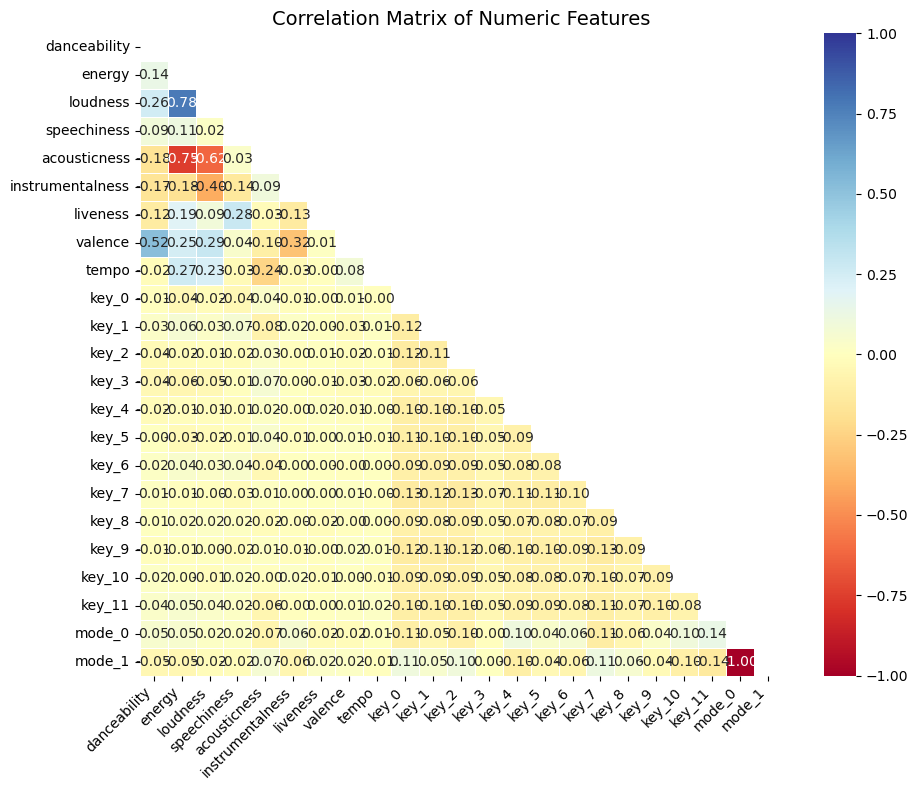

In [32]:
# Calculate correlation matrix for numeric features
correlation_matrix = df.corr()

# Create heatmap with mask for upper triangle
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu',fmt='.2f', linewidths=0.5,vmin=-1, vmax=1,mask=mask,square=True)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

### Handling highly correlated features:
1. mode_0 and mode_1 have perfect negative correlation (-1.0) because they're one-hot encoded
   from the same binary variable (when one is 1, the other is 0)
2. energy and acousticness have strong negative correlation (-0.79)
3. loudness and acousticness have strong negative correlation (-0.62)
4. valence and danceability have moderate positive correlation (0.52)
    
#### Solution:
- Drop one of the mode columns (mode_1) as it's redundant
- Drop energy and acousticness as they're highly correlated
- Keep loudness as it might be more interpretable than acousticness
- We'll drop valence as danceability is often more relevant for music recommendation systems



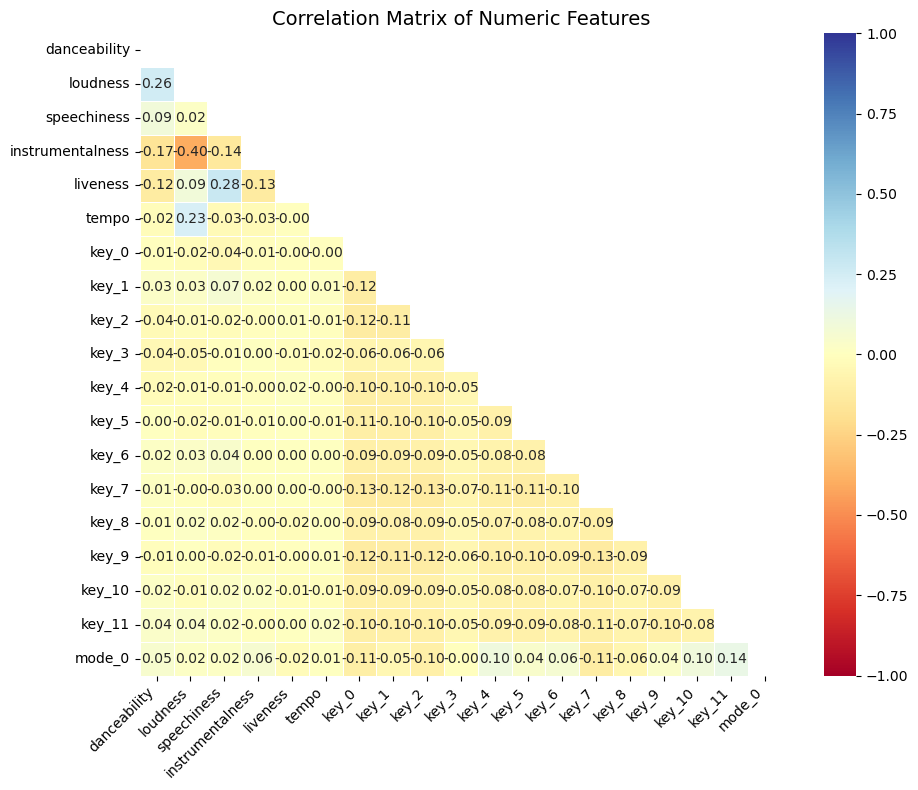

In [33]:
# Drop highly correlated features:
df.drop(['mode_1', 'acousticness', 'energy', 'valence'], axis=1, inplace=True)

# Calculate correlation matrix for numeric features
correlation_matrix = df.corr()

# Create heatmap with mask for upper triangle
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu',fmt='.2f', linewidths=0.5,vmin=-1, vmax=1,mask=mask,square=True)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

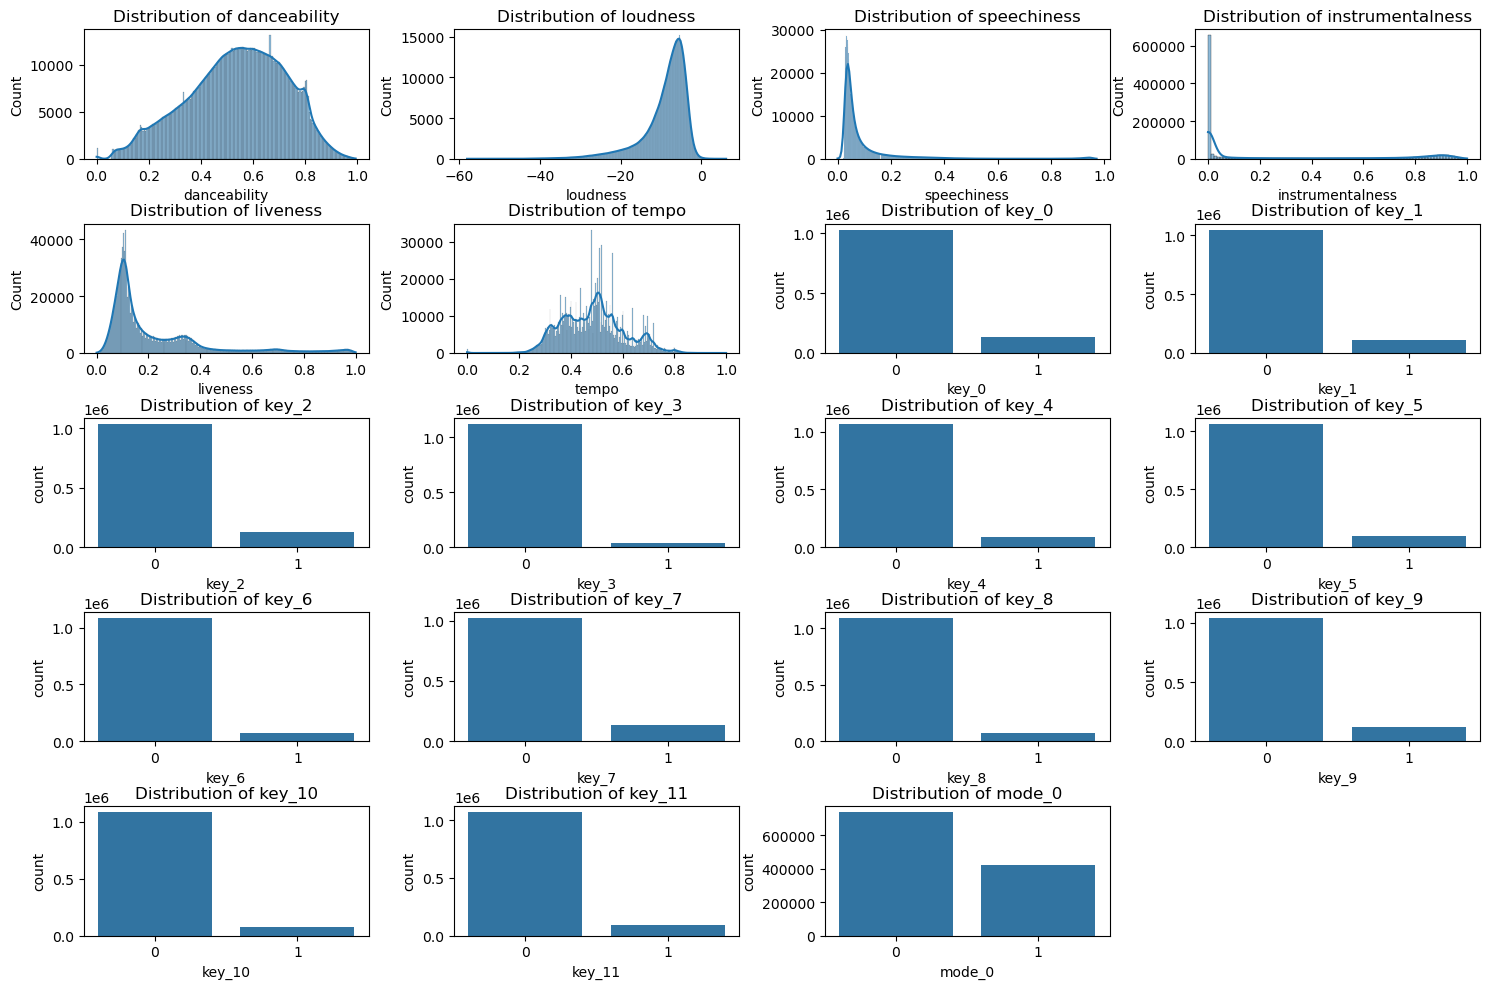

In [37]:
# Create a figure with subplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each feature and create appropriate plots
for i, feature in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)  # Adjust grid size based on number of features
    
    # Check if the feature is a one-hot encoded key or mode column
    if feature.startswith('key_') or feature.startswith('mode_'):
        # For binary features, use countplot instead of histplot
        sns.countplot(x=df[feature])
        plt.xticks([0, 1], ['0', '1'])
    else:
        # For continuous features, use histplot with KDE
        sns.histplot(df[feature], kde=True)
    
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.3)